# **FGV EESP**

- ## PCA - Expectativa de Inflação
---



### **Bibliotecas**

In [ ]:
install.packages("broom")
install.packages("factoextra")
install.packages("MASS")
install.packages("stargazer")
install.packages("urca")

In [ ]:
library(broom)
library(dplyr)
library(factoextra)
library(ggplot2)
library(httr)
library(lubridate)
library(MASS)
library(readxl)
library(stargazer)
library(tidyverse)
library(urca)

### **Dados**

In [125]:
# Caminho do arquivo original
file_path <- "https://github.com/matheusrmorgado/inflation-expectation/raw/main/data/public_data.xlsx"

# Download do arquivo
download.file(file_path, "public_data.xlsx")

# Ler o arquivo Excel e converter em dataframe
df_public_data <- as.data.frame(read_excel("public_data.xlsx"))

# Converter year e month_name
df_public_data <- df_public_data %>%
  mutate(year = as.numeric(year),  # Converter year para numérico
         month_name = factor(month_name, levels = month.abb, ordered = TRUE))  # Converter month_name para um fator ordenado

# Converter month_date
df_public_data$month_date <- ymd(df_public_data$month_date)  # Converter month_date para formato Date

# Unifica as 2 tabelas de dados
df_public_data <- cbind(df_public_data, df_codace)

# Lista de variáveis para transformar em séries temporais
vars_to_convert <- c("month", "market_inflation_expectation", "consumer_inflation_expectation", "codace_recession", "consumer_confidence_index", "inflation_target", "inflation_target_lower_bound", "inflation_target_upper_bound", "inflation_target_wtd_avg", "inflation_target_lower_bound_wtd_avg", "inflation_target_upper_bound_wtd_avg", "ipca", "selic", "selic_deflated", "real_household_income", "real_household_income_trend", "real_household_income_gap", "real_exchange_rate", "real_exchange_rate_trend", "real_exchange_rate_gap", "gdp", "primary_fiscal_result", "primary_fiscal_result_to_gdp", "ipca_lag", "selic_deflated_lag", "primary_fiscal_result_to_gdp_lag", "real_exchange_rate_gap_lag", "real_household_income_gap_lag", "consumer_confidence_index_lag", "search_term_ipca", "search_term_selic", "search_term_inflation")

# Loop para transformar as variáveis em séries temporais
for (var in vars_to_convert) {
  df_public_data[[var]] <- ts(df_public_data[[var]], start = c(2006, 1), frequency = 12)
}

### **Modelo PCA**

In [369]:
# Selecionar variáveis do modelo PCA
pca_model_variables <- df_public_data[, c("month", "consumer_inflation_expectation", "market_inflation_expectation", "ipca_lag", "inflation_target_wtd_avg", "primary_fiscal_result_to_gdp_lag", "selic_deflated_lag", "real_exchange_rate_gap_lag", "real_household_income_gap_lag")]

In [372]:
cor(pca_model_variables[ , 4:9])

,ipca_lag,inflation_target_wtd_avg,primary_fiscal_result_to_gdp_lag,selic_deflated_lag,real_exchange_rate_gap_lag,real_household_income_gap_lag
ipca_lag,1.0000000,-0.16866269,-0.182578051,-0.31766964,0.276386154,-0.39760885
inflation_target_wtd_avg,-0.1686627,1.00000000,-0.762284217,0.33187202,-0.052547266,0.00171797
primary_fiscal_result_to_gdp_lag,-0.1825781,-0.76228422,1.000000000,-0.31027736,0.005872059,-0.15773186
selic_deflated_lag,-0.3176696,0.33187202,-0.310277364,1.00000000,-0.273207703,0.06736961
real_exchange_rate_gap_lag,0.2763862,-0.05254727,0.005872059,-0.27320770,1.000000000,0.13660179
real_household_income_gap_lag,-0.3976088,0.00171797,-0.157731855,0.06736961,0.136601786,1.00000000


In [401]:
pca_model <- prcomp(pca_model_variables[ , 4:9], scale = TRUE)

In [402]:
pca_model$rotation

,PC1,PC2,PC3,PC4,PC5,PC6
ipca_lag,-0.2612606,0.6665167,0.135015832,-0.04697545,-0.5347130,0.4256106
inflation_target_wtd_avg,0.5839157,0.2810567,-0.005291826,0.17934470,0.4897115,0.5550133
primary_fiscal_result_to_gdp_lag,-0.5386585,-0.4447117,0.109805306,-0.19378495,0.2553077,0.6303068
selic_deflated_lag,0.4776098,-0.2065145,0.222396120,-0.76673815,-0.2849566,0.1034070
real_exchange_rate_gap_lag,-0.1980531,0.3641492,-0.625851318,-0.54850010,0.3502517,-0.1138061
real_household_income_gap_lag,0.1824727,-0.3220888,-0.727004546,0.19833413,-0.4529968,0.2998072


In [403]:
summary(pca_model)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6
Standard deviation     1.4382 1.2216 1.0930 0.7821 0.74462 0.28018
Proportion of Variance 0.3448 0.2487 0.1991 0.1019 0.09241 0.01308
Cumulative Proportion  0.3448 0.5935 0.7926 0.8945 0.98692 1.00000

In [404]:
cor(pca_model$x)

,PC1,PC2,PC3,PC4,PC5,PC6
PC1,1.000000e+00,-3.921023e-16,1.901509e-16,-2.036930e-16,3.431385e-16,2.208868e-16
PC2,-3.921023e-16,1.000000e+00,7.417733e-17,-5.944091e-17,1.059240e-18,3.006298e-16
PC3,1.901509e-16,7.417733e-17,1.000000e+00,2.761335e-16,3.968981e-16,7.311325e-16
PC4,-2.036930e-16,-5.944091e-17,2.761335e-16,1.000000e+00,-1.185126e-15,-4.115522e-16
PC5,3.431385e-16,1.059240e-18,3.968981e-16,-1.185126e-15,1.000000e+00,-9.905680e-16
PC6,2.208868e-16,3.006298e-16,7.311325e-16,-4.115522e-16,-9.905680e-16,1.000000e+00


In [405]:
cor(pca_model_variables[ , 4:9], pca_model$x)

,PC1,PC2,PC3,PC4,PC5,PC6
ipca_lag,-0.3757505,0.8142065,0.147573267,-0.0367377,-0.3981606,0.11924743
inflation_target_wtd_avg,0.8397997,0.3433346,-0.005784003,0.1402586,0.3646514,0.15550342
primary_fiscal_result_to_gdp_lag,-0.7747099,-0.5432530,0.120017982,-0.1515518,0.1901085,0.17659913
selic_deflated_lag,0.6869083,-0.2522749,0.243080546,-0.5996365,-0.2121858,0.02897255
real_exchange_rate_gap_lag,-0.2848441,0.4448391,-0.684059955,-0.4289609,0.2608061,-0.03188615
real_household_income_gap_lag,0.2624360,-0.3934587,-0.794621154,0.1551095,-0.3373127,0.08399987


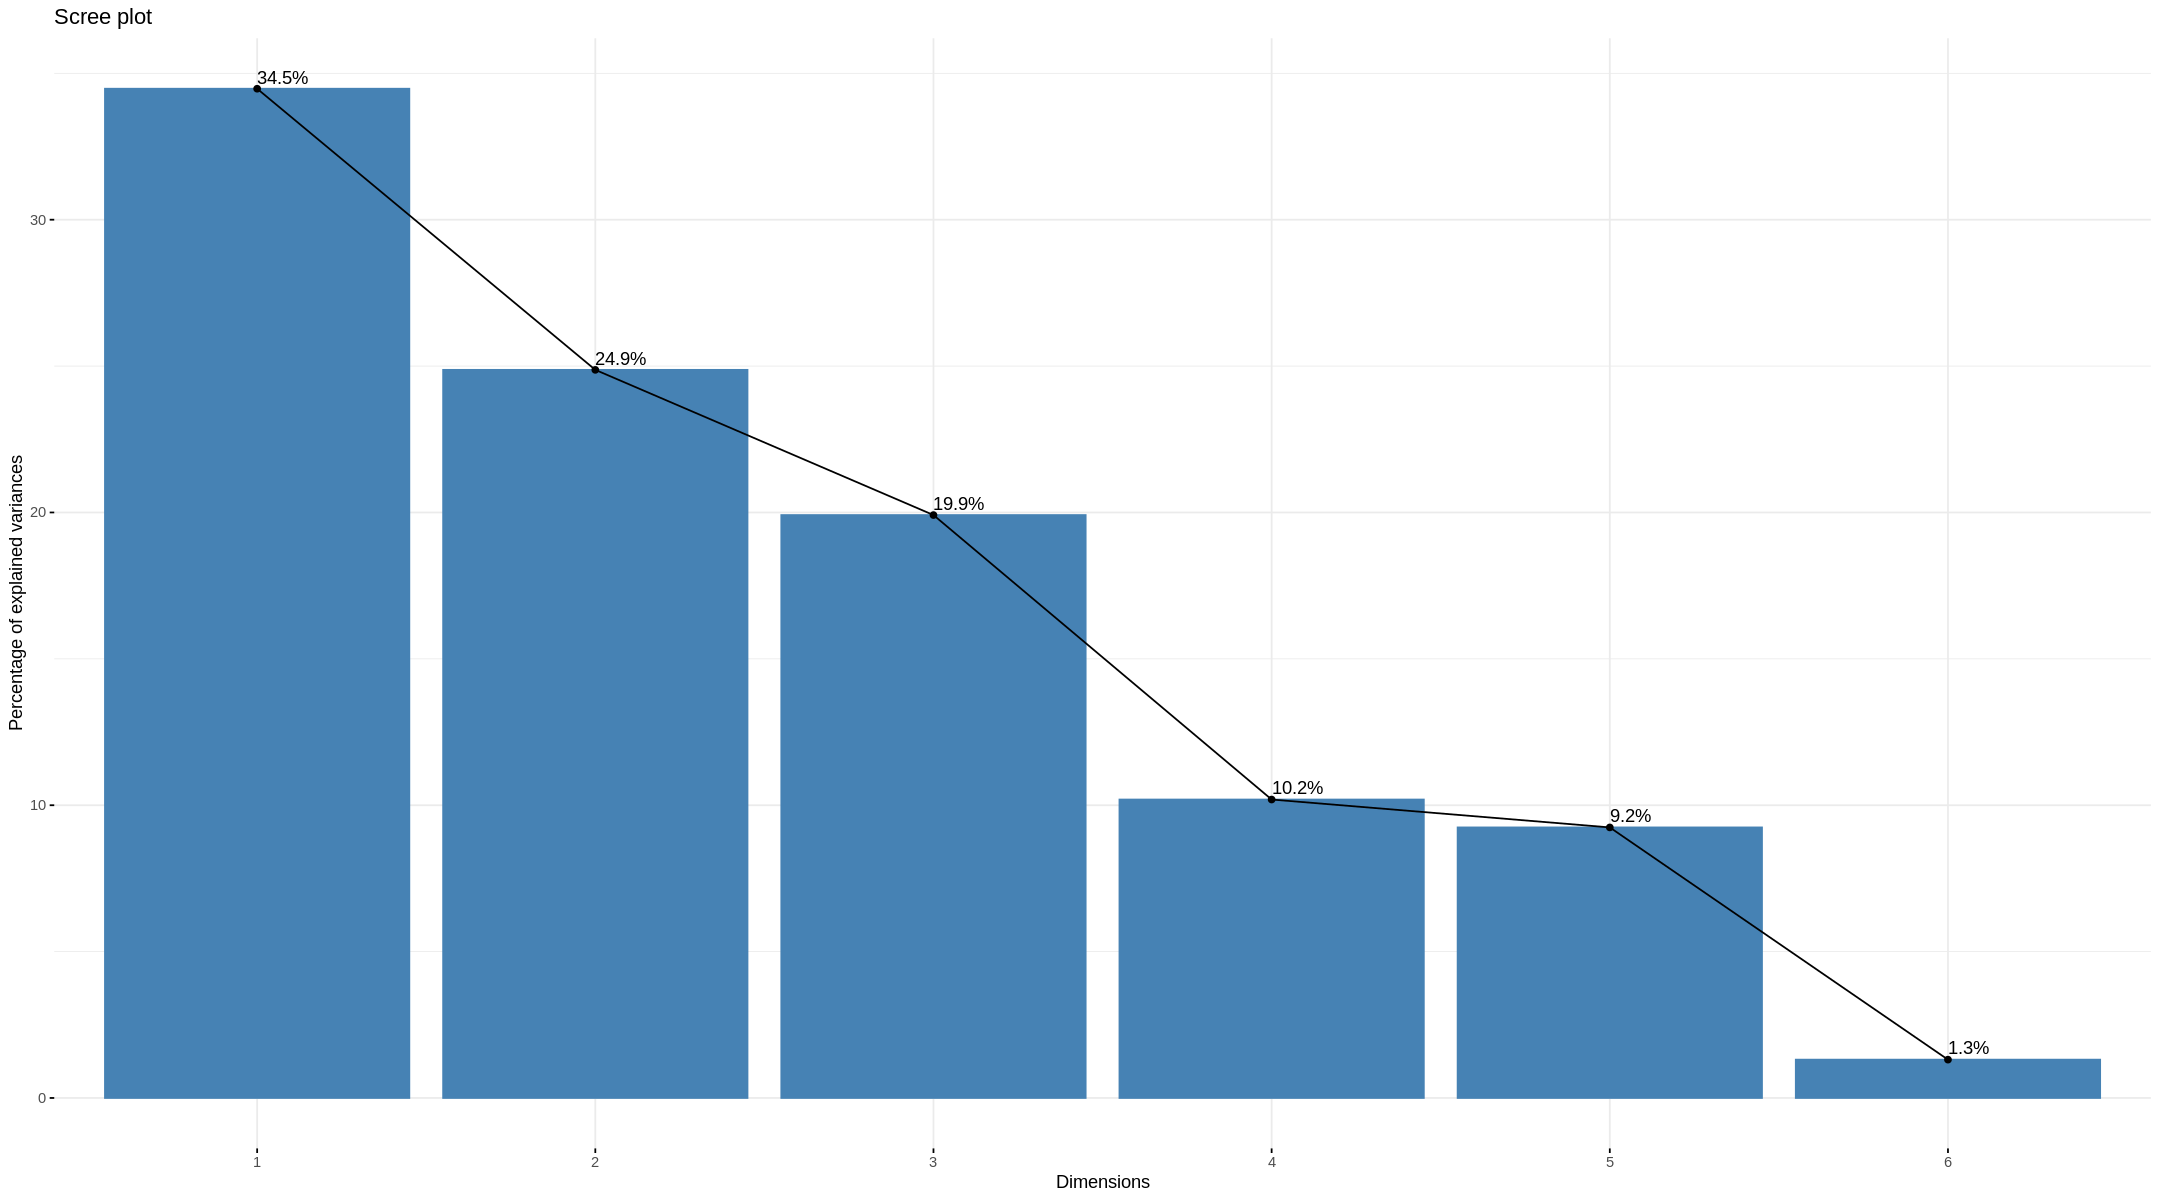

In [406]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 18, repr.plot.height = 10)

# Visualizar a proporção da variância explicada por cada componente principal
fviz_eig(pca_model, addlabels = TRUE)

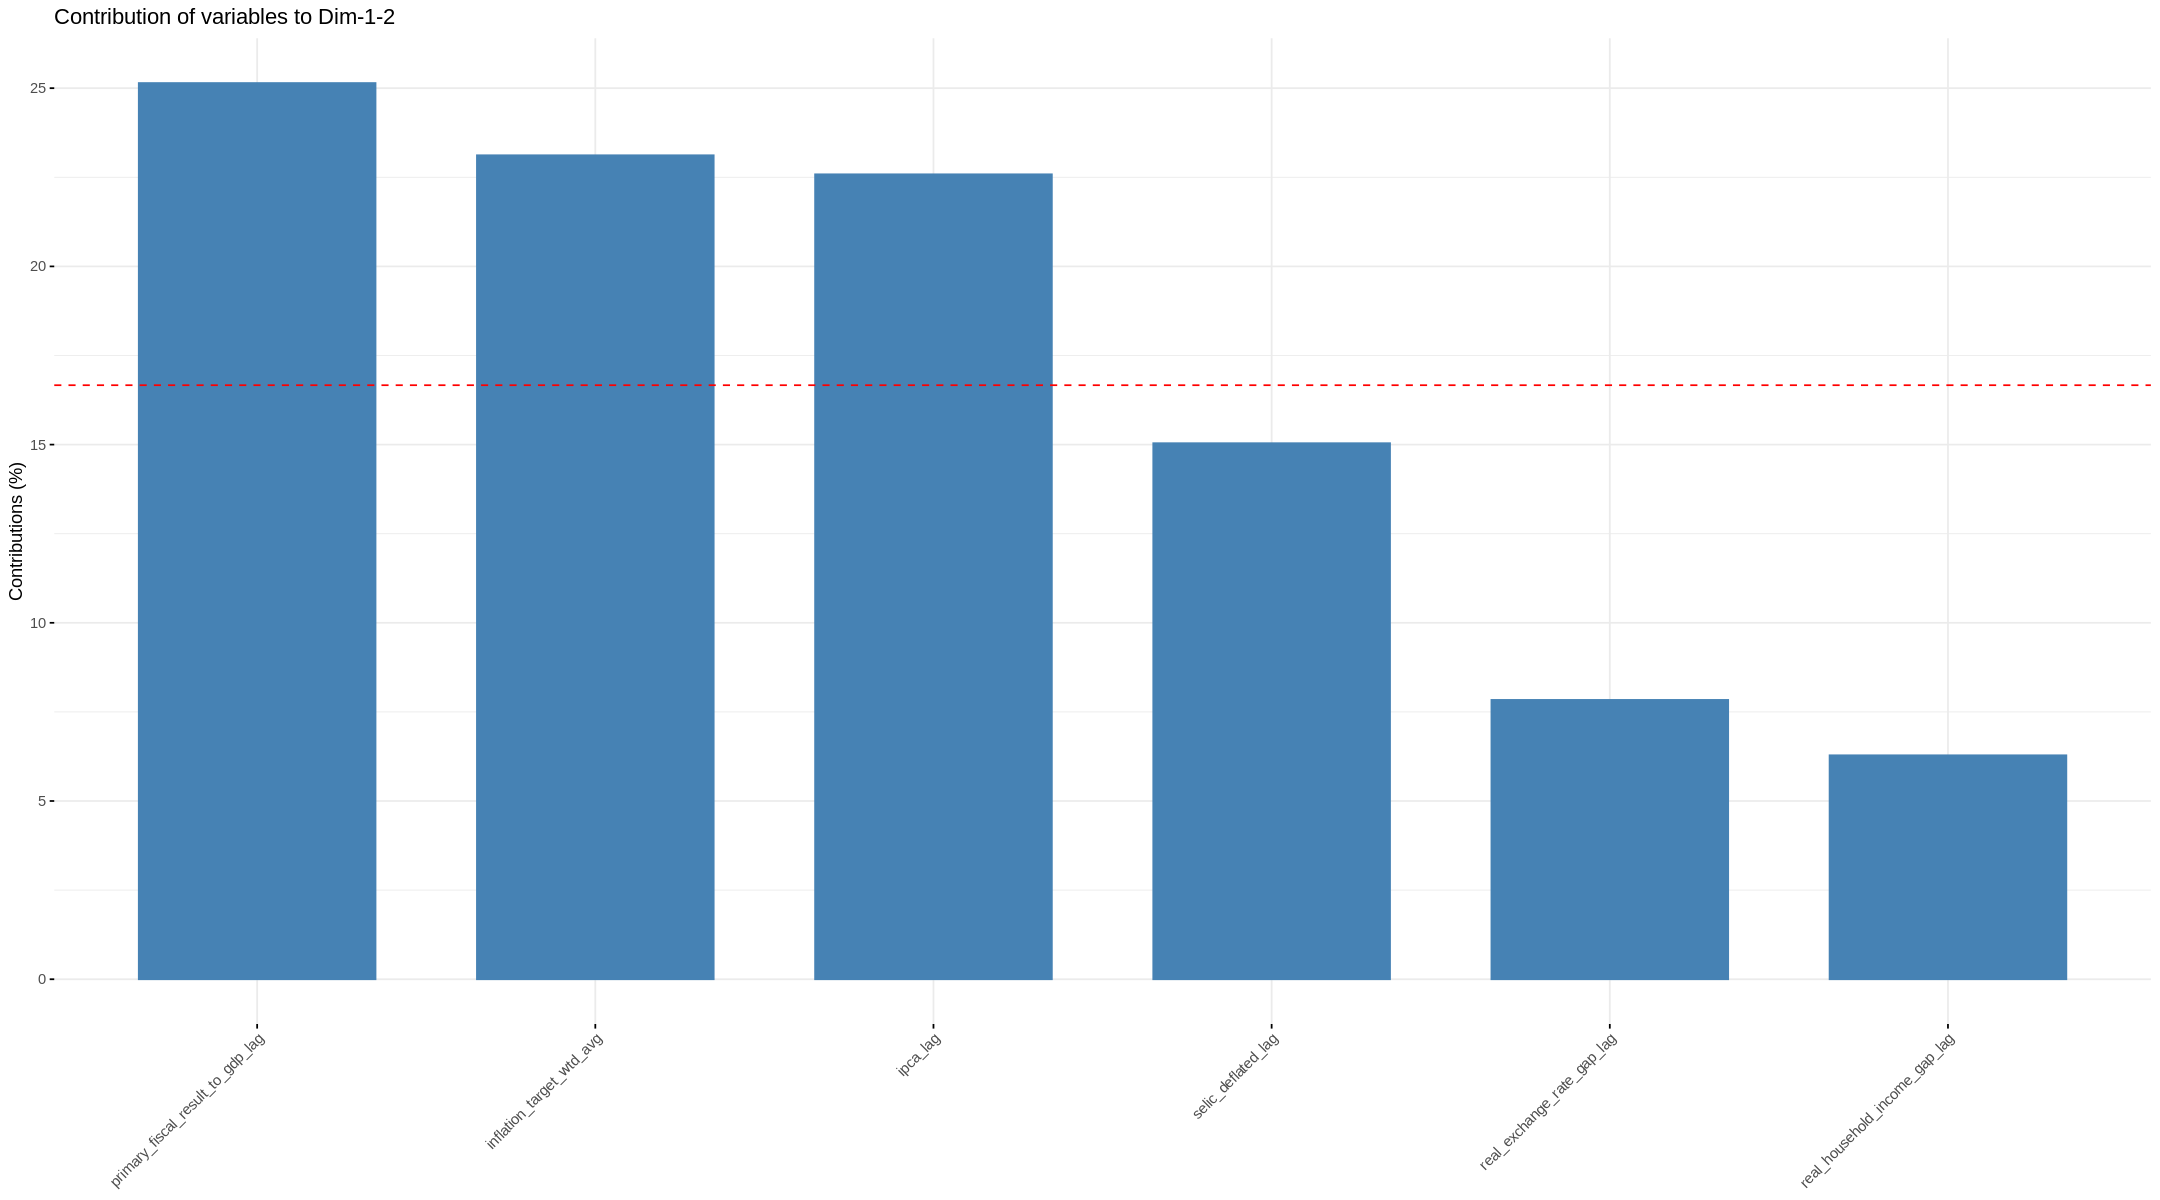

In [407]:
# Visualizar as contribuições de indivíduos nos componentes principais
fviz_contrib(pca_model, choice = "var", axes = c(1, 2))

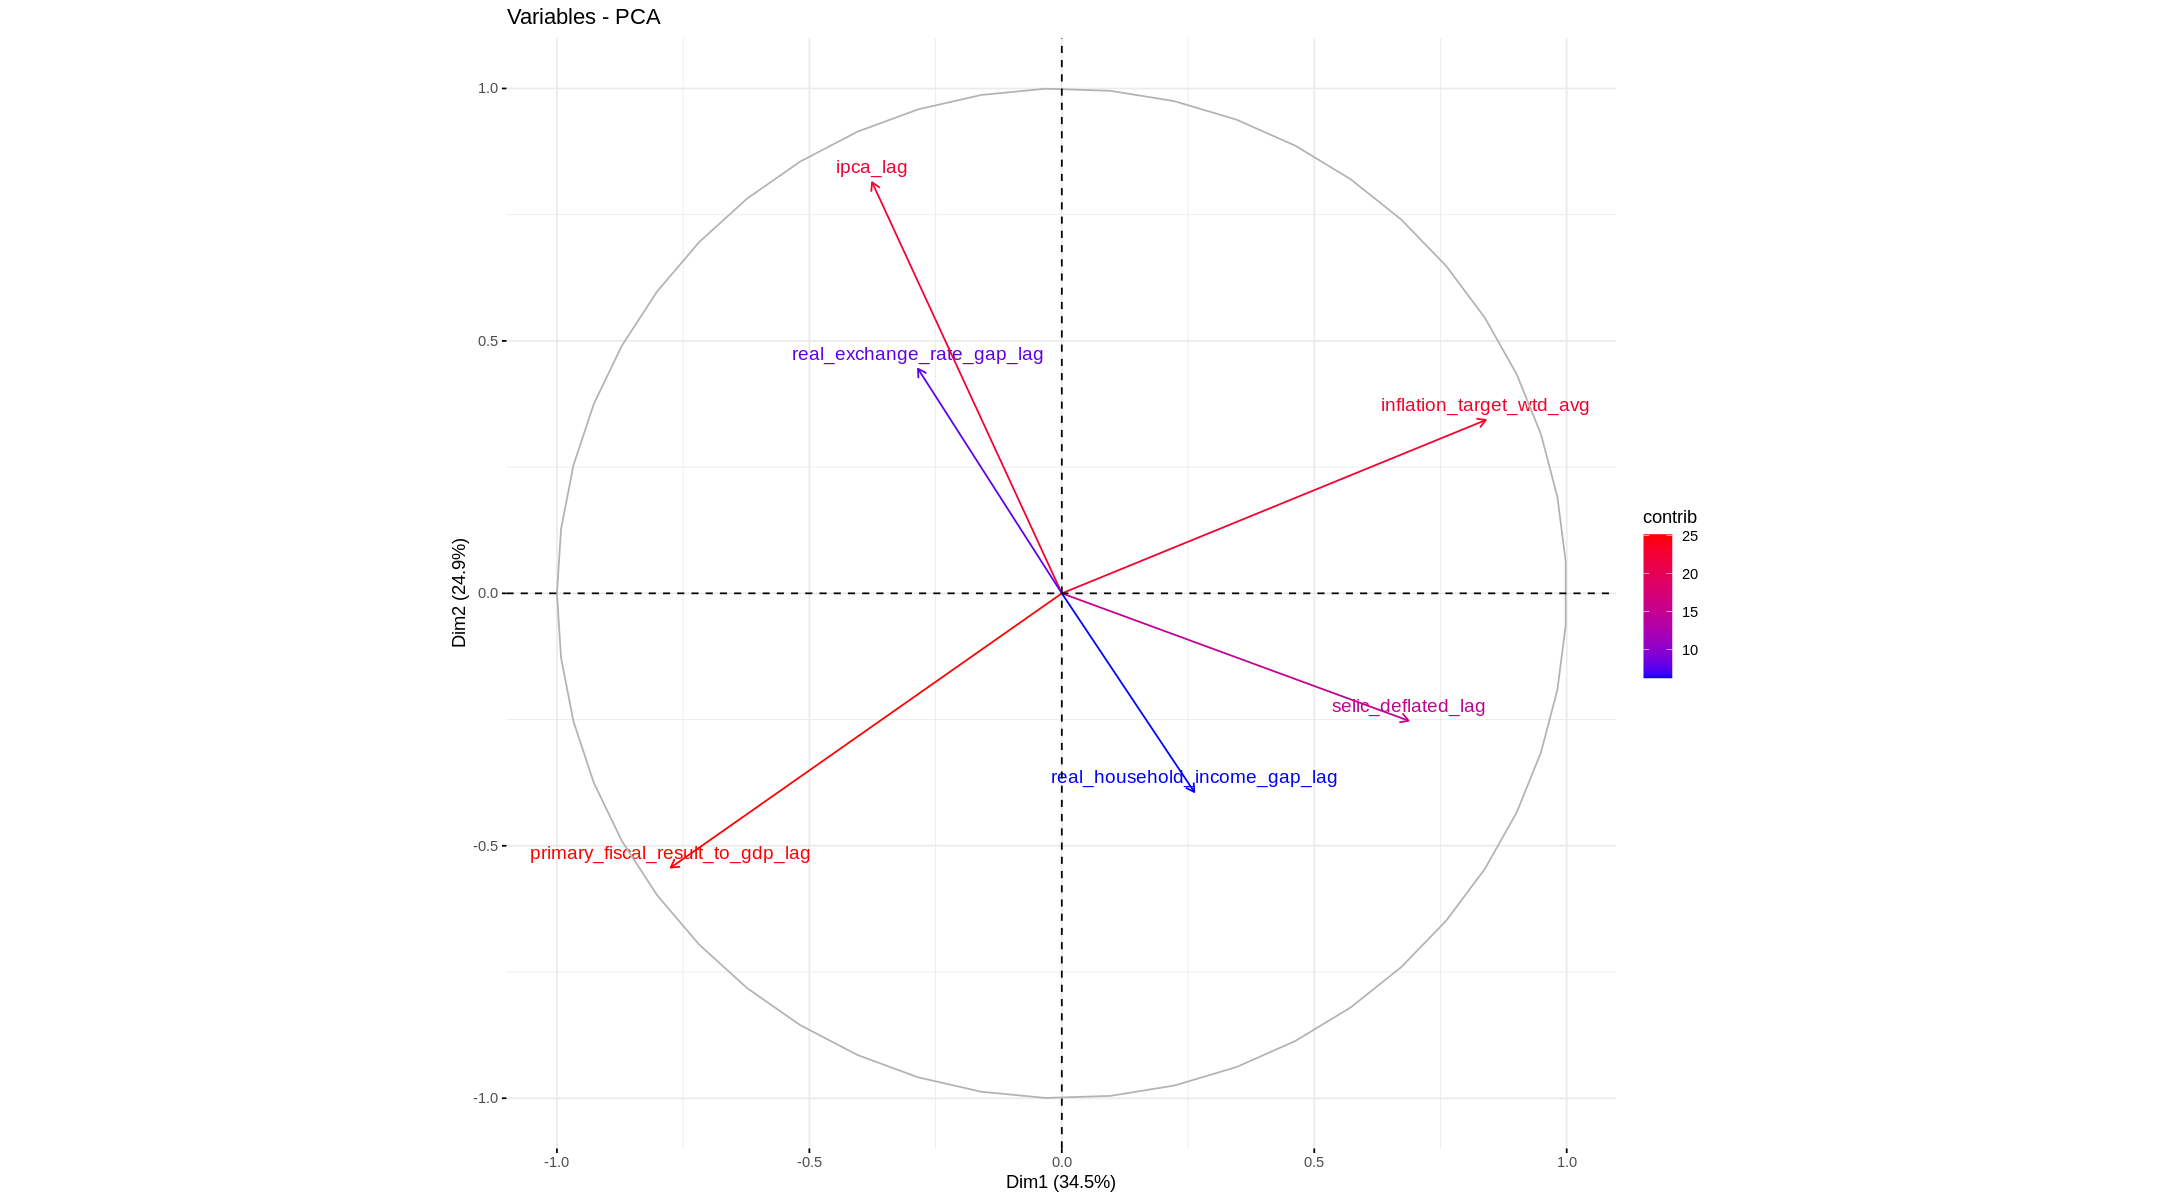

In [408]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 18, repr.plot.height = 10)

# Visualização do peso de cada componente
fviz_pca_var(pca_model, col.var = "contrib", gradient.cols = c("blue", "red"))

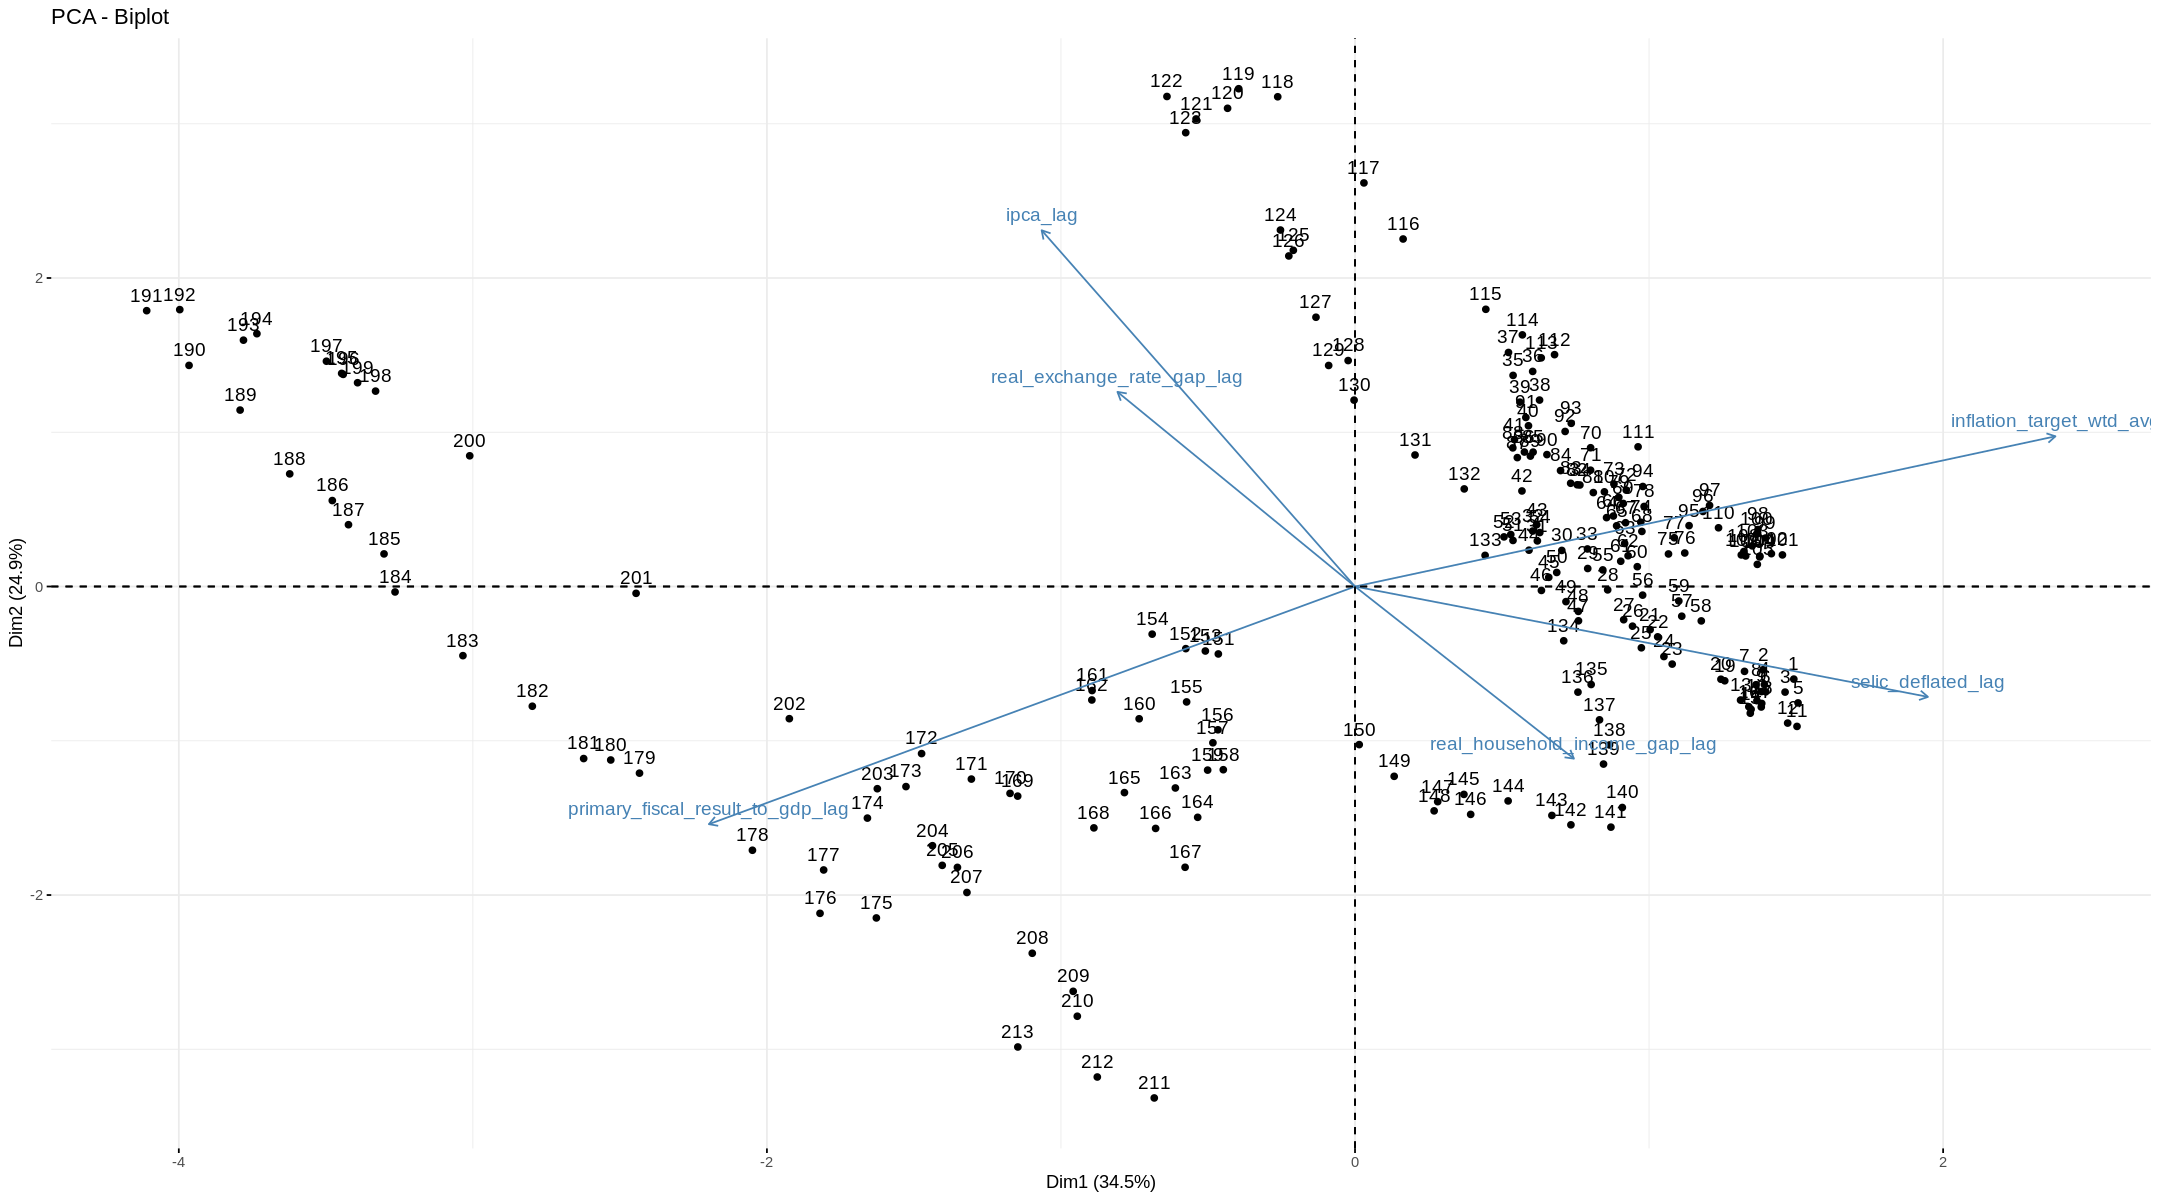

In [409]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 18, repr.plot.height = 10)

fviz_pca_biplot(pca_model)

In [410]:
# Criar dataframe com as colunas de séries temporais
scores_df <- data.frame(
  pca_1 = ts(pca_model$x[,1], start = c(2006, 1), frequency = 12),
  pca_2 = ts(pca_model$x[,2], start = c(2006, 1), frequency = 12),
  pca_3 = ts(pca_model$x[,3], start = c(2006, 1), frequency = 12),
  pca_4 = ts(pca_model$x[,4], start = c(2006, 1), frequency = 12),
  pca_5 = ts(pca_model$x[,5], start = c(2006, 1), frequency = 12),
  pca_6 = ts(pca_model$x[,6], start = c(2006, 1), frequency = 12)
)

# Une apenas algumas colunas do dataset de variáveis
scores_df <- cbind(pca_model_variables[ , 1:3], scores_df)

# Verificar a nova estrutura
str(scores_df)

'data.frame':	213 obs. of  9 variables:
 $ month                         : Time-Series  from 2006 to 2024: 2006 2006 2006 2006 2006 ...
 $ consumer_inflation_expectation: Time-Series  from 2006 to 2024: 6.9 7 6.9 6.5 6.7 6.3 6.9 6.4 6.3 5.8 ...
 $ market_inflation_expectation  : Time-Series  from 2006 to 2024: 4.58 4.49 4.36 4.16 4.18 4.25 4.4 4.48 4.29 4.05 ...
 $ pca_1                         : Time-Series  from 2006 to 2024: 1.49 1.39 1.46 1.39 1.51 ...
 $ pca_2                         : Time-Series  from 2006 to 2024: -0.6 -0.54 -0.684 -0.635 -0.755 ...
 $ pca_3                         : Time-Series  from 2006 to 2024: -0.407 -0.403 0.129 0.257 0.331 ...
 $ pca_4                         : Time-Series  from 2006 to 2024: -1.58 -1.48 -1.19 -1.17 -1.24 ...
 $ pca_5                         : Time-Series  from 2006 to 2024: -0.725 -0.638 -0.653 -0.463 -0.247 ...
 $ pca_6                         : Time-Series  from 2006 to 2024: 0.902 0.873 0.791 0.67 0.441 ...


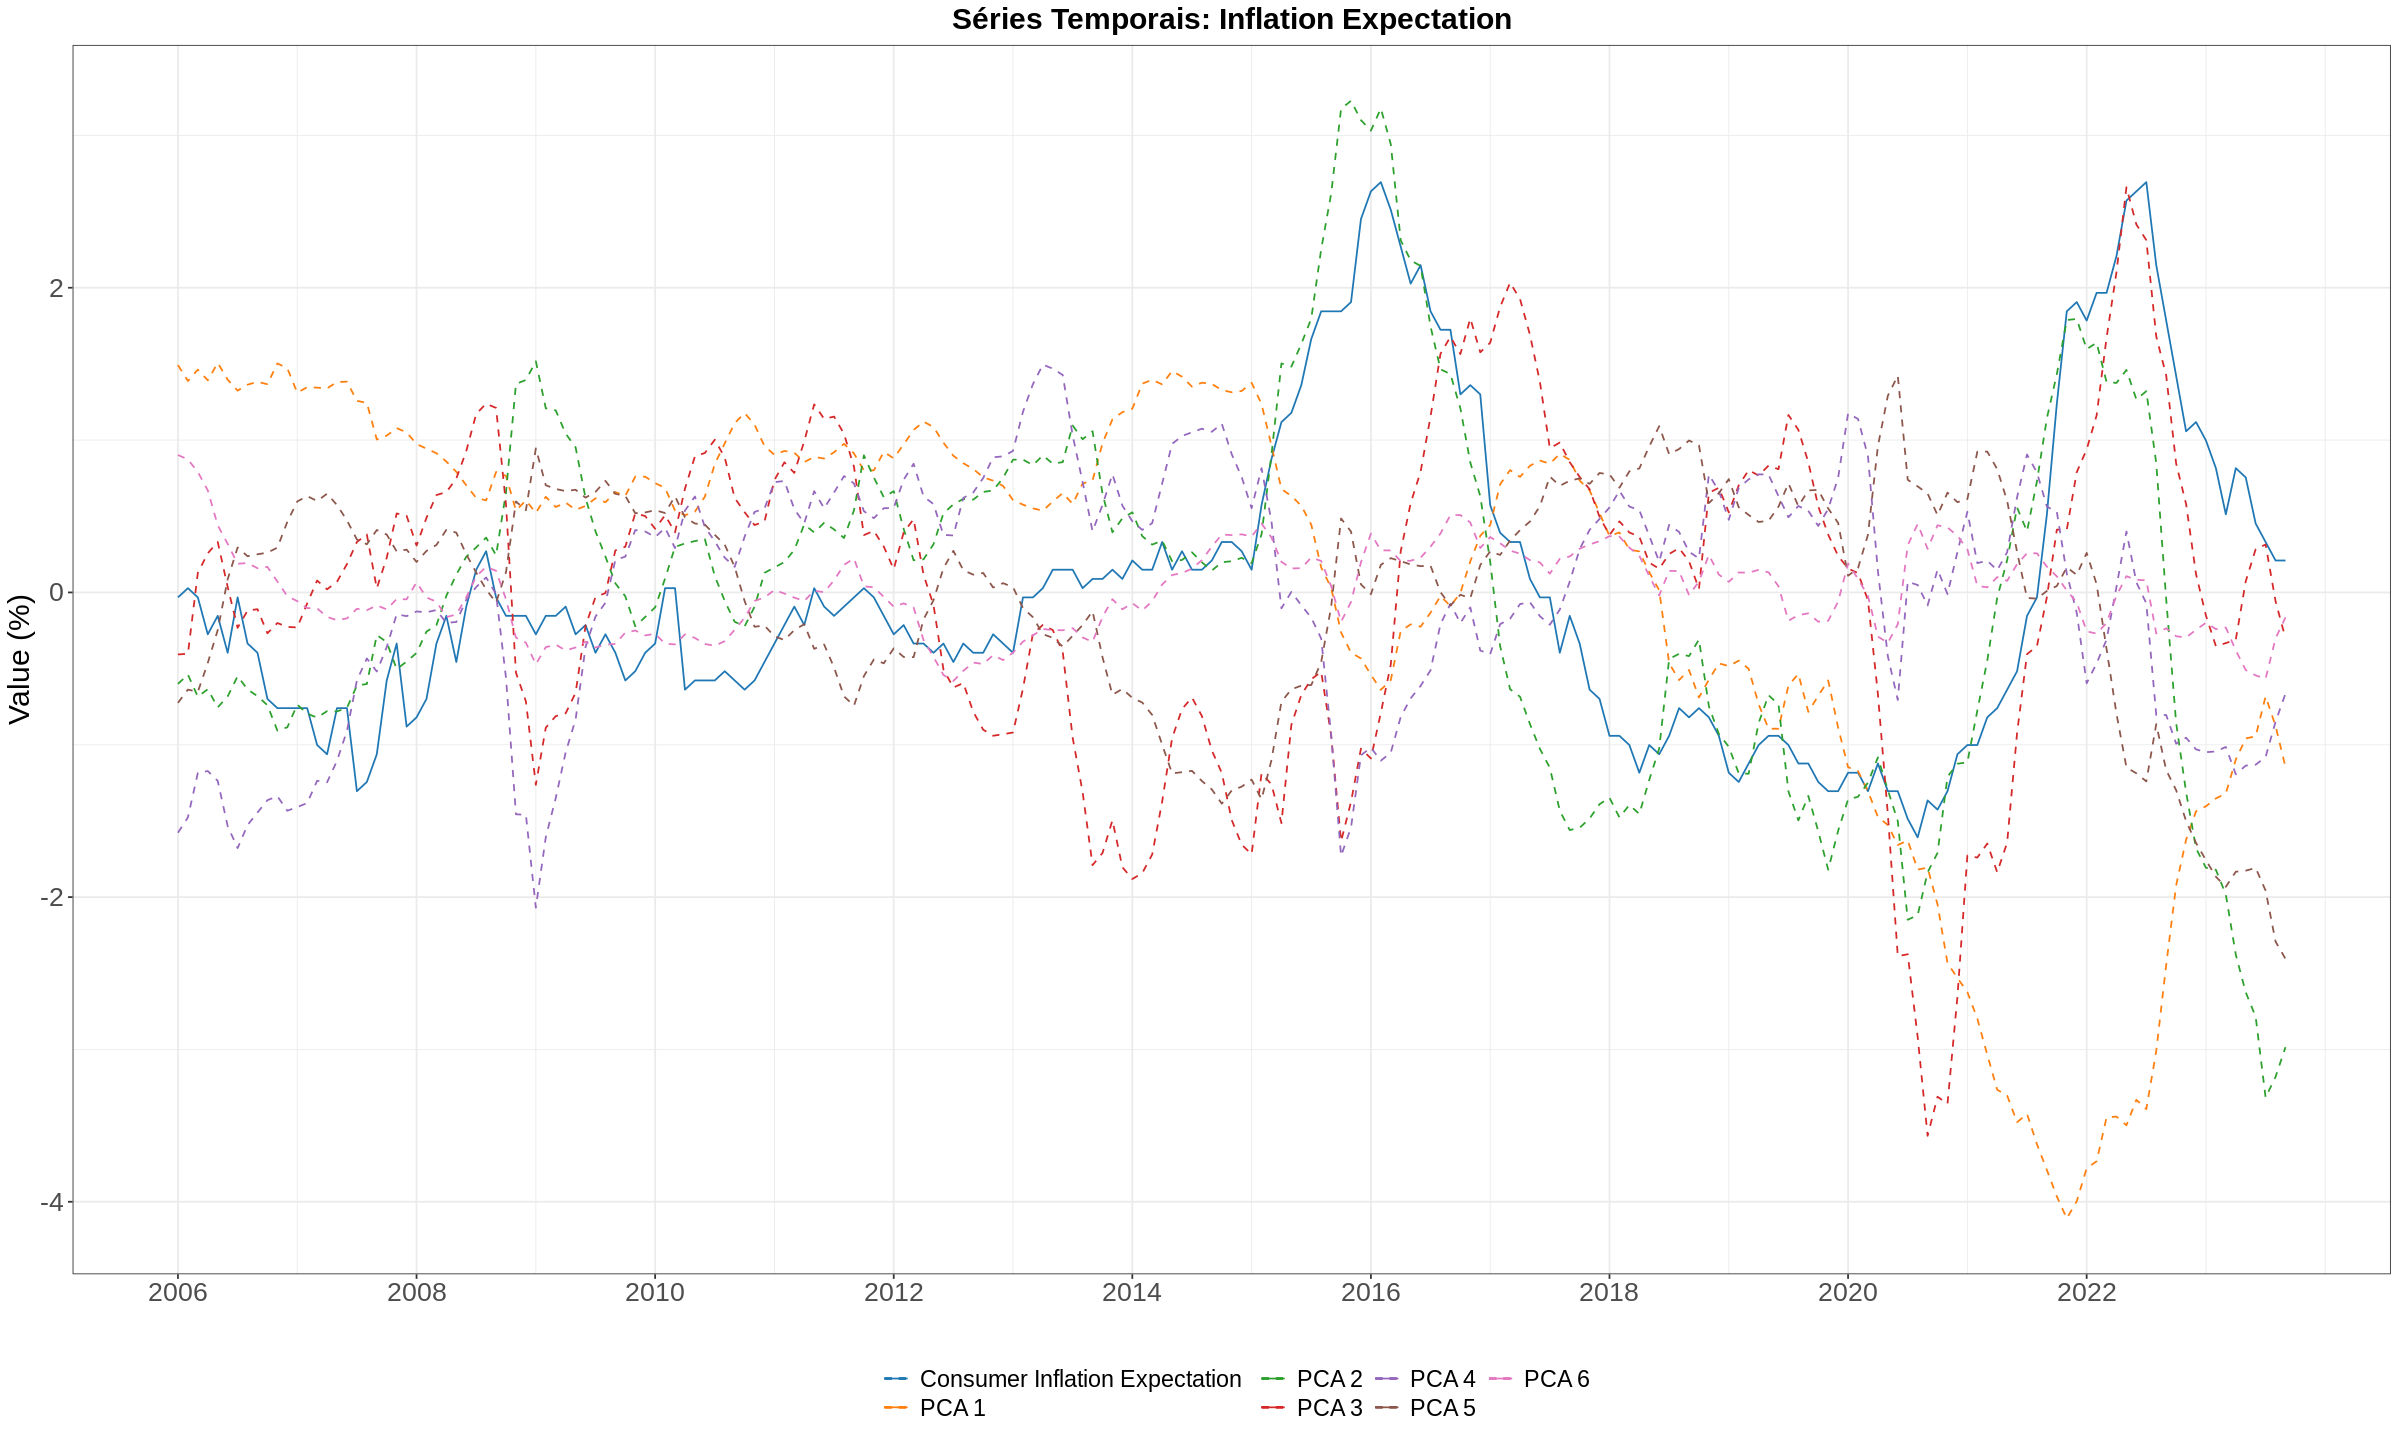

In [411]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 12)

# Plotar as séries temporais
ggplot(scores_df) +
  geom_line(aes(x = month, y = scale(consumer_inflation_expectation), color = "Consumer Inflation Expectation")) +
  geom_line(aes(x = month, y = pca_1, color = "PCA 1"), linetype = "dashed") +
  geom_line(aes(x = month, y = pca_2, color = "PCA 2"), linetype = "dashed") +
  geom_line(aes(x = month, y = pca_3, color = "PCA 3"), linetype = "dashed") +
  geom_line(aes(x = month, y = pca_4, color = "PCA 4"), linetype = "dashed") +
  geom_line(aes(x = month, y = pca_5, color = "PCA 5"), linetype = "dashed") +
  geom_line(aes(x = month, y = pca_6, color = "PCA 6"), linetype = "dashed") +
  labs(x = "", y = "Value (%)", title = "Séries Temporais: Inflation Expectation") +
  scale_color_manual(values = c("#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2"), name = "") +
  theme_bw() +
  theme(legend.position = "bottom",
        legend.text = element_text(size = 14),
        legend.title = element_blank(),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14)) +
  scale_x_continuous(breaks = seq(min(scores_df$month), max(scores_df$month), by = 2))

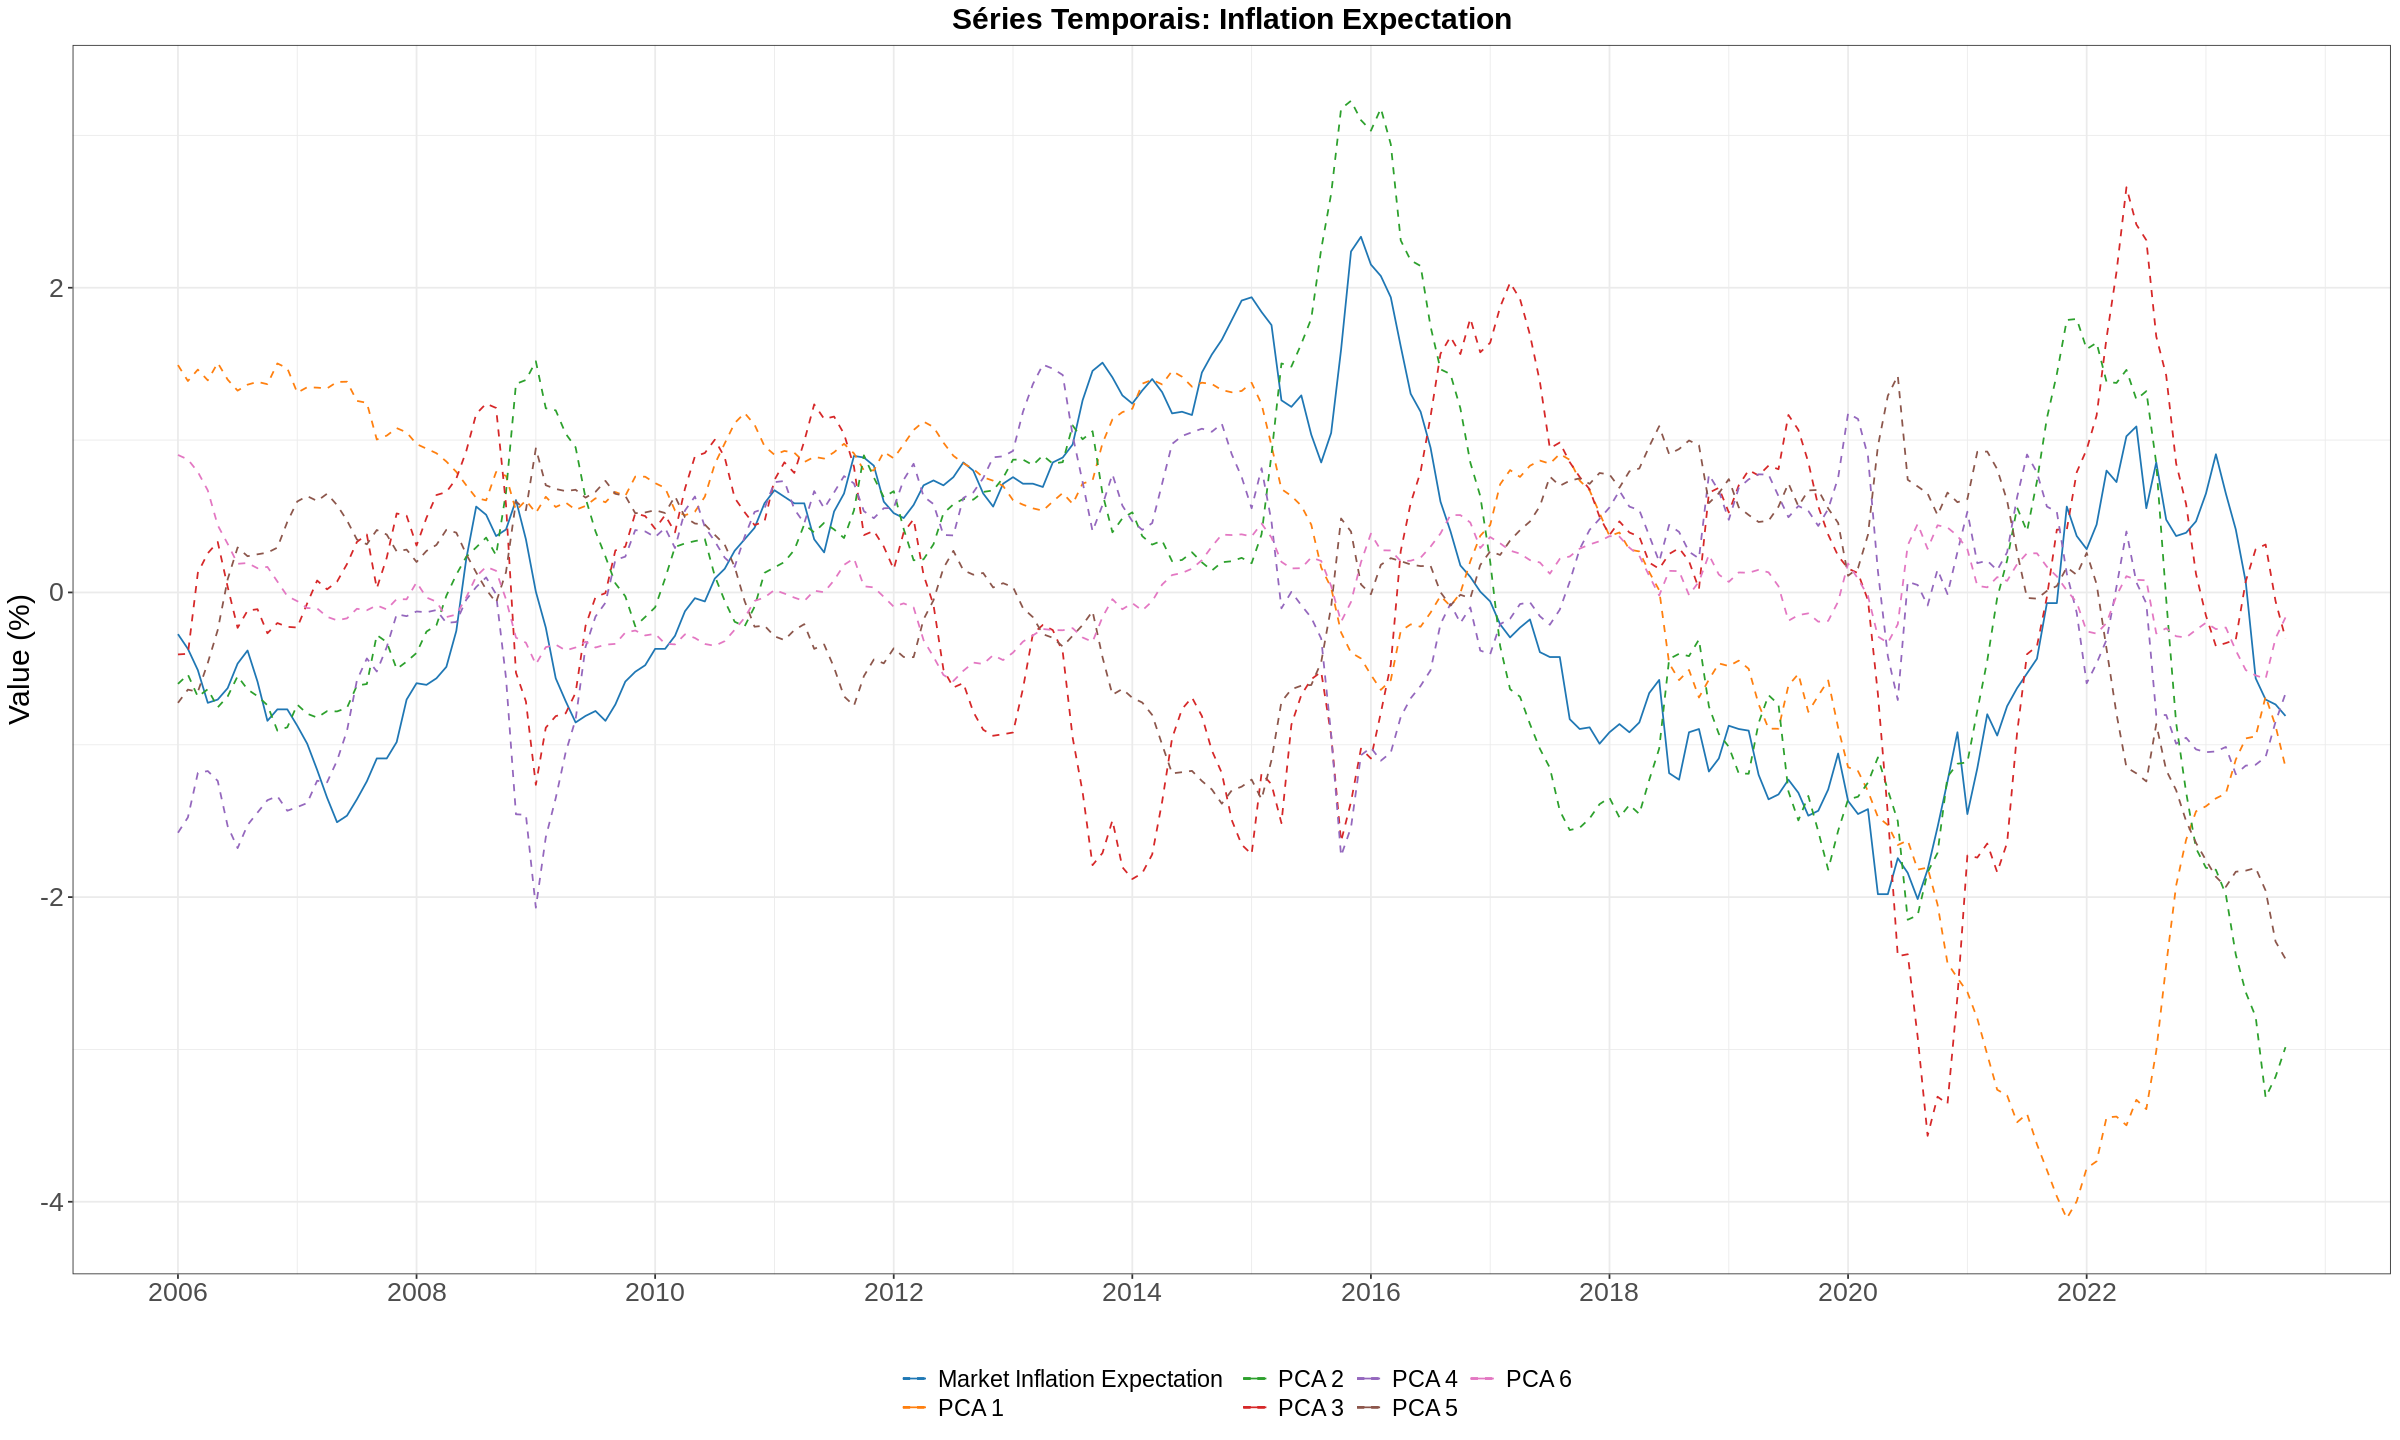

In [412]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 12)

# Plotar as séries temporais
ggplot(scores_df) +
  geom_line(aes(x = month, y = scale(market_inflation_expectation), color = "Market Inflation Expectation")) +
  geom_line(aes(x = month, y = pca_1, color = "PCA 1"), linetype = "dashed") +
  geom_line(aes(x = month, y = pca_2, color = "PCA 2"), linetype = "dashed") +
  geom_line(aes(x = month, y = pca_3, color = "PCA 3"), linetype = "dashed") +
  geom_line(aes(x = month, y = pca_4, color = "PCA 4"), linetype = "dashed") +
  geom_line(aes(x = month, y = pca_5, color = "PCA 5"), linetype = "dashed") +
  geom_line(aes(x = month, y = pca_6, color = "PCA 6"), linetype = "dashed") +
  labs(x = "", y = "Value (%)", title = "Séries Temporais: Inflation Expectation") +
  scale_color_manual(values = c("#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2"), name = "") +
  theme_bw() +
  theme(legend.position = "bottom",
        legend.text = element_text(size = 14),
        legend.title = element_blank(),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14)) +
  scale_x_continuous(breaks = seq(min(scores_df$month), max(scores_df$month), by = 2))

In [415]:
consumer_linear_model = lm(scale(consumer_inflation_expectation) ~
    pca_1 + pca_2 + pca_3 + pca_4 + pca_5 - 1,
    data = scores_df)

market_linear_model = lm(scale(market_inflation_expectation) ~
    pca_1 + pca_2 + pca_3 + pca_4 + pca_5 - 1,
    data = scores_df)

In [416]:
summary( consumer_linear_model )


Call:
lm(formula = scale(consumer_inflation_expectation) ~ pca_1 + 
    pca_2 + pca_3 + pca_4 + pca_5 - 1, data = scores_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.86507 -0.26582 -0.01232  0.23859  1.16240 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
pca_1 -0.18319    0.01824 -10.046  < 2e-16 ***
pca_2  0.53145    0.02147  24.754  < 2e-16 ***
pca_3  0.20858    0.02399   8.693 1.06e-15 ***
pca_4 -0.34998    0.03353 -10.436  < 2e-16 ***
pca_5 -0.65675    0.03522 -18.647  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3819 on 208 degrees of freedom
Multiple R-squared:  0.8569,	Adjusted R-squared:  0.8535 
F-statistic: 249.2 on 5 and 208 DF,  p-value: < 2.2e-16


In [417]:
summary( market_linear_model )


Call:
lm(formula = scale(market_inflation_expectation) ~ pca_1 + pca_2 + 
    pca_3 + pca_4 + pca_5 - 1, data = scores_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.86914 -0.26218  0.00561  0.26995  0.89758 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
pca_1  0.11993    0.01845   6.500 5.85e-10 ***
pca_2  0.56439    0.02172  25.981  < 2e-16 ***
pca_3 -0.06644    0.02428  -2.737 0.006741 ** 
pca_4  0.13043    0.03393   3.844 0.000161 ***
pca_5 -0.77470    0.03564 -21.739  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3864 on 208 degrees of freedom
Multiple R-squared:  0.8535,	Adjusted R-squared:   0.85 
F-statistic: 242.4 on 5 and 208 DF,  p-value: < 2.2e-16


In [418]:
consumer_residuals <- residuals(consumer_linear_model)
consumer_residuals_df <- consumer_residuals %>% as.data.frame()  %>% rename(residuals = ".")

market_residuals <- residuals(market_linear_model)
market_residuals_df <- market_residuals %>% as.data.frame()  %>% rename(residuals = ".")

In [419]:
stargazer(consumer_residuals_df, digits = 2, type = "text")


Statistic  N  Mean  St. Dev.  Min  Max 
---------------------------------------
residuals 213 -0.00   0.38   -0.87 1.16
---------------------------------------


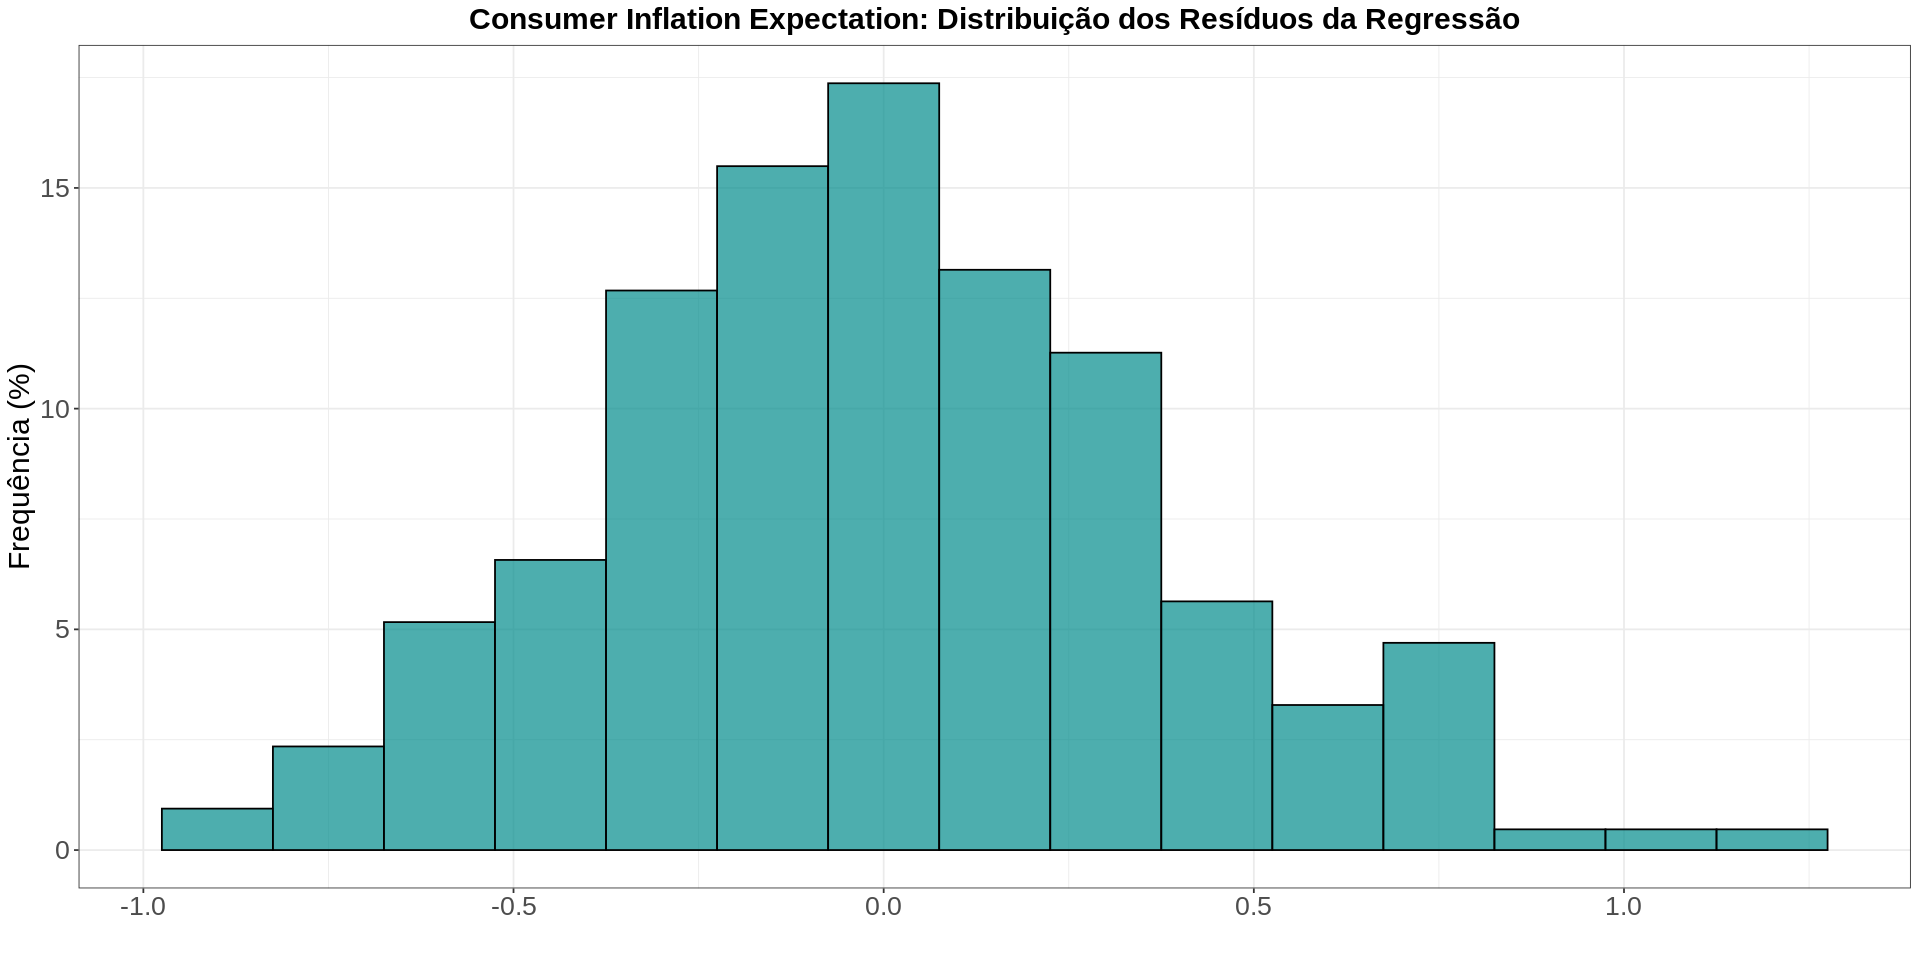

In [420]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 8)

# Plotar o histograma dos resíduos da regressão com valores relativos em %
ggplot(consumer_residuals_df, aes(x = residuals, y = 100 * after_stat(count) / sum(after_stat(count)))) +
  geom_histogram(binwidth = 0.15, color = "black", fill = "darkcyan", alpha = 0.7) +
  labs(title = "Consumer Inflation Expectation: Distribuição dos Resíduos da Regressão", x = "", y = "Frequência (%)") +
  theme_bw() +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

In [421]:
stargazer(market_residuals_df, digits = 2, type = "text")


Statistic  N  Mean  St. Dev.  Min  Max 
---------------------------------------
residuals 213 -0.00   0.38   -0.87 0.90
---------------------------------------


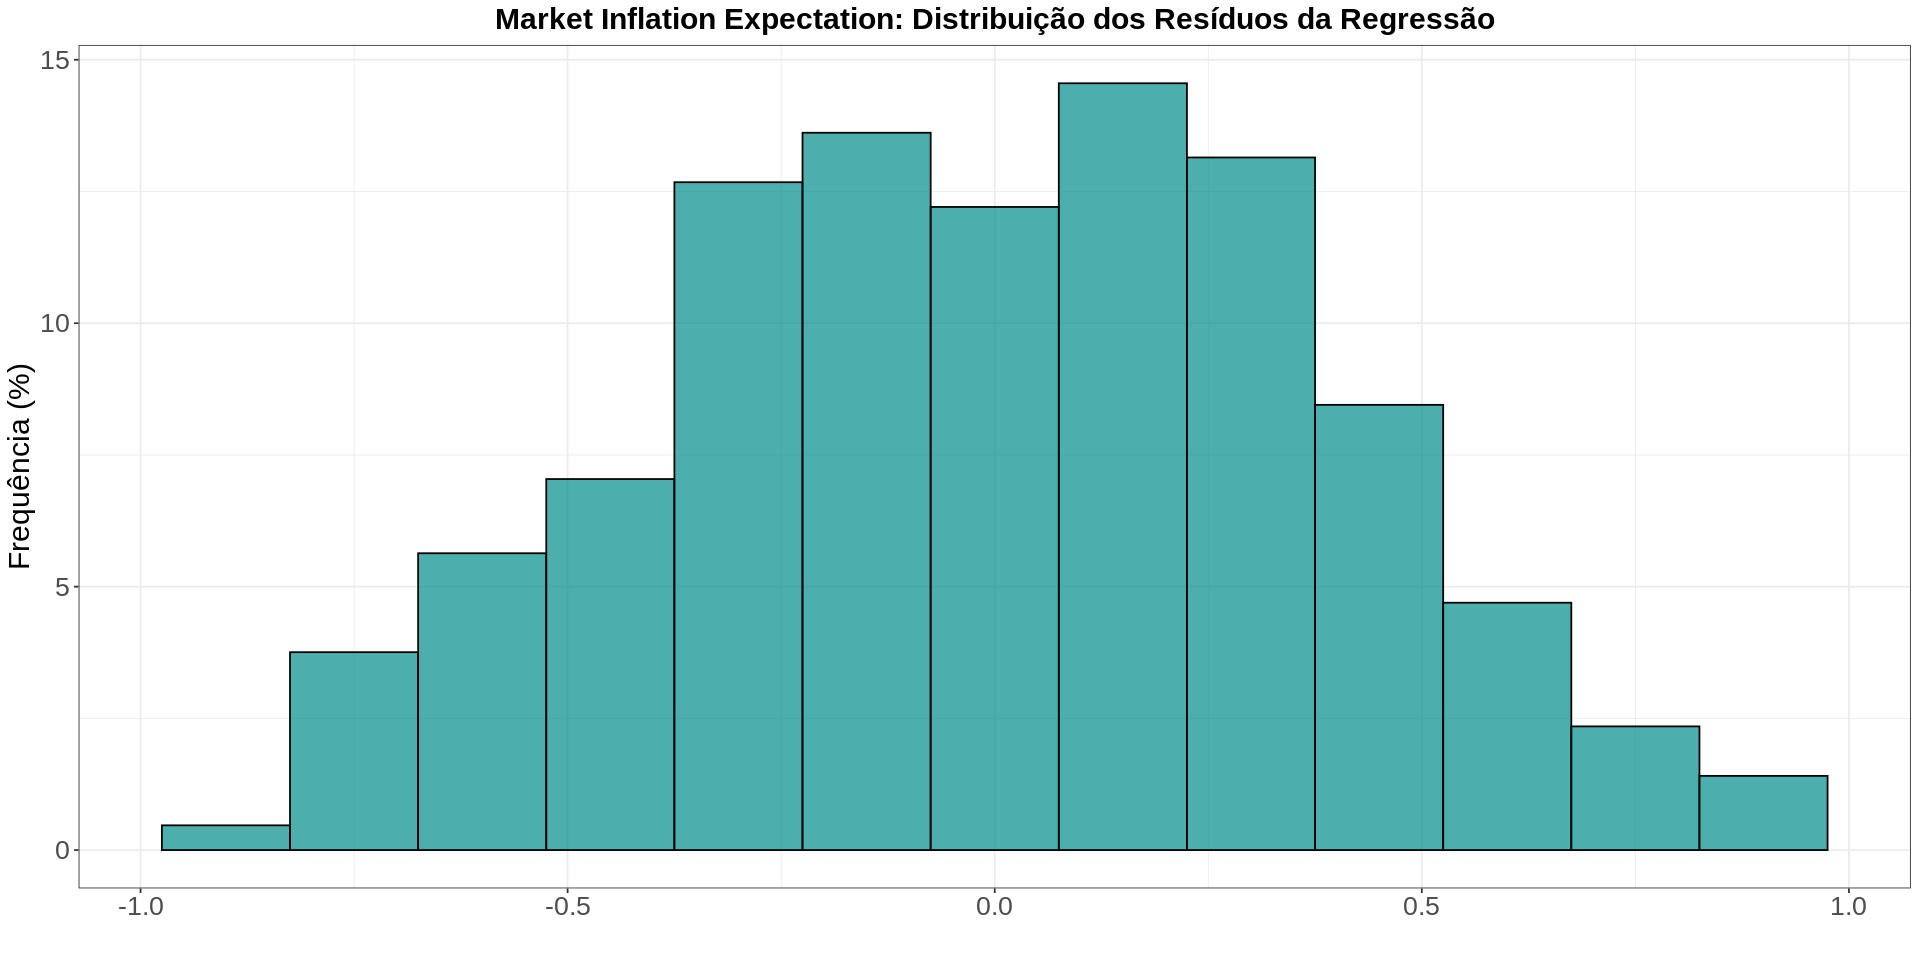

In [422]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 8)

# Plotar o market_residuals dos resíduos da regressão com valores relativos em %
ggplot(market_residuals_df, aes(x = residuals, y = 100 * after_stat(count) / sum(after_stat(count)))) +
  geom_histogram(binwidth = 0.15, color = "black", fill = "darkcyan", alpha = 0.7) +
  labs(title = "Market Inflation Expectation: Distribuição dos Resíduos da Regressão", x = "", y = "Frequência (%)") +
  theme_bw() +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

In [423]:
summary( ur.df( consumer_residuals, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63008 -0.09088 -0.01343  0.10484  0.50179 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -0.0140817  0.0301980  -0.466   0.6415  
z.lag.1      -0.0955226  0.0460060  -2.076   0.0392 *
tt            0.0001466  0.0002440   0.601   0.5487  
z.diff.lag1  -0.0201080  0.0786604  -0.256   0.7985  
z.diff.lag2  -0.1094950  0.0784869  -1.395   0.1647  
z.diff.lag3  -0.0023149  0.0788324  -0.029   0.9766  
z.diff.lag4  -0.0860957  0.0778118  -1.106   0.2700  
z.diff.lag5   0.0679339  0.0769790   0.882   0.3787  
z.diff.lag6   0.0014236  0.0776240   0.018   0.9854  
z.diff.lag7  -0.0091625  0.0764940  -0.120   0.9048  
z.diff.lag8  -0.0958469  0.0764797  -1.253   0.2117  


In [424]:
summary( ur.df( market_residuals, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9292 -0.1289  0.0166  0.1242  0.7287 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -0.0287957  0.0364397  -0.790  0.43041   
z.lag.1      -0.2430530  0.0826457  -2.941  0.00369 **
tt            0.0002804  0.0002956   0.949  0.34411   
z.diff.lag1   0.2087943  0.0941415   2.218  0.02778 * 
z.diff.lag2  -0.0113219  0.0944762  -0.120  0.90474   
z.diff.lag3   0.0931899  0.0897487   1.038  0.30047   
z.diff.lag4   0.0295189  0.0900338   0.328  0.74338   
z.diff.lag5  -0.0143873  0.0857448  -0.168  0.86693   
z.diff.lag6  -0.0192252  0.0819237  -0.235  0.81472   
z.diff.lag7  -0.1052236  0.0796231  -1.322  0.18796   
z.diff.lag8  -0.1393113  0.0772586  -1.803  0.07299 .

In [425]:
summary( ur.kpss( consumer_residuals, type = "tau", lags = "short") )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.423 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


In [426]:
summary( ur.kpss( market_residuals, type = "tau", lags = "short") )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.2022 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216
